In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

In [ ]:
# Load the shapefile
shapefile_path = 'borders_tribes.shp'
gdf = gpd.read_file(shapefile_path)

# Display the first few rows to verify it's loaded correctly
print(gdf.head())

       NAME  TRIBE_CODE        LAT       LON  \
0    ABABDA           1  23.161800  33.70160   
1  ABARAMBO           2   3.702955  26.79730   
2       ABE           3   6.069531  -4.26032   
3    ACHOLI           4   3.108121  32.65680   
4   ADAMAWA           5   7.556091  13.18470   

                                            geometry  
0  POLYGON ((35.73971 22.87611, 35.54412 22.64326...  
1  POLYGON ((26.45080 3.39284, 26.45227 3.39798, ...  
2  POLYGON ((-4.07477 6.37522, -4.01895 6.26358, ...  
3  POLYGON ((33.25900 3.88539, 33.45547 3.86574, ...  
4  POLYGON ((14.14605 9.96943, 14.14605 9.87880, ...  


In [ ]:
gdf_column_names = gdf.columns.tolist()
print("Column names:", gdf_column_names)

Column names: ['NAME', 'TRIBE_CODE', 'LAT', 'LON', 'geometry']


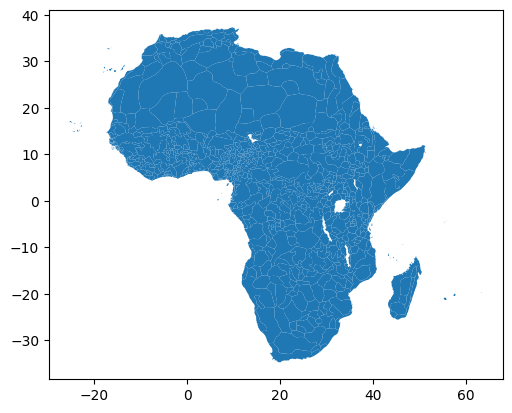

In [ ]:
gdf.plot()
plt.show()


In [ ]:
# Load the .dta file
dta_path = 'slave_trade_QJE.dta'
df = pd.read_stata(dta_path)

# Display the first few rows to verify it's loaded correctly
print(df.head())


  isocode       country  ln_maddison_pcgdp2000  ln_export_area  ln_export_pop  \
0     AGO        Angola               6.670766        7.967494      14.399250   
1     BDI       Burundi               6.354370        1.140843       4.451658   
2     BEN         Benin               7.187657        8.304137      13.308970   
3     BFA  Burkina Faso               6.748760        6.413822      11.724286   
4     BWA      Botswana               8.377471       -2.302585       3.912023   

   colony0  colony1  colony2  colony3  colony4  ...  ln_avg_oil_pop  \
0      0.0      0.0      0.0      1.0      0.0  ...        0.643126   
1      0.0      0.0      0.0      0.0      1.0  ...       -9.210340   
2      0.0      0.0      1.0      0.0      0.0  ...       -3.531555   
3      0.0      0.0      1.0      0.0      0.0  ...       -9.210340   
4      0.0      1.0      0.0      0.0      0.0  ...       -9.210340   

   ln_avg_all_diamonds_pop  ln_pop_dens_1400  atlantic_distance_minimum  \
0          

In [ ]:
column_names = df.columns.tolist()
print("Column names:", column_names)

Column names: ['isocode', 'country', 'ln_maddison_pcgdp2000', 'ln_export_area', 'ln_export_pop', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6', 'colony7', 'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum', 'islam', 'legor_fr', 'legor_uk', 'region_n', 'region_s', 'region_w', 'region_e', 'region_c', 'ln_avg_gold_pop', 'ln_avg_oil_pop', 'ln_avg_all_diamonds_pop', 'ln_pop_dens_1400', 'atlantic_distance_minimum', 'indian_distance_minimum', 'saharan_distance_minimum', 'red_sea_distance_minimum', 'ethnic_fractionalization', 'state_dev', 'land_area']


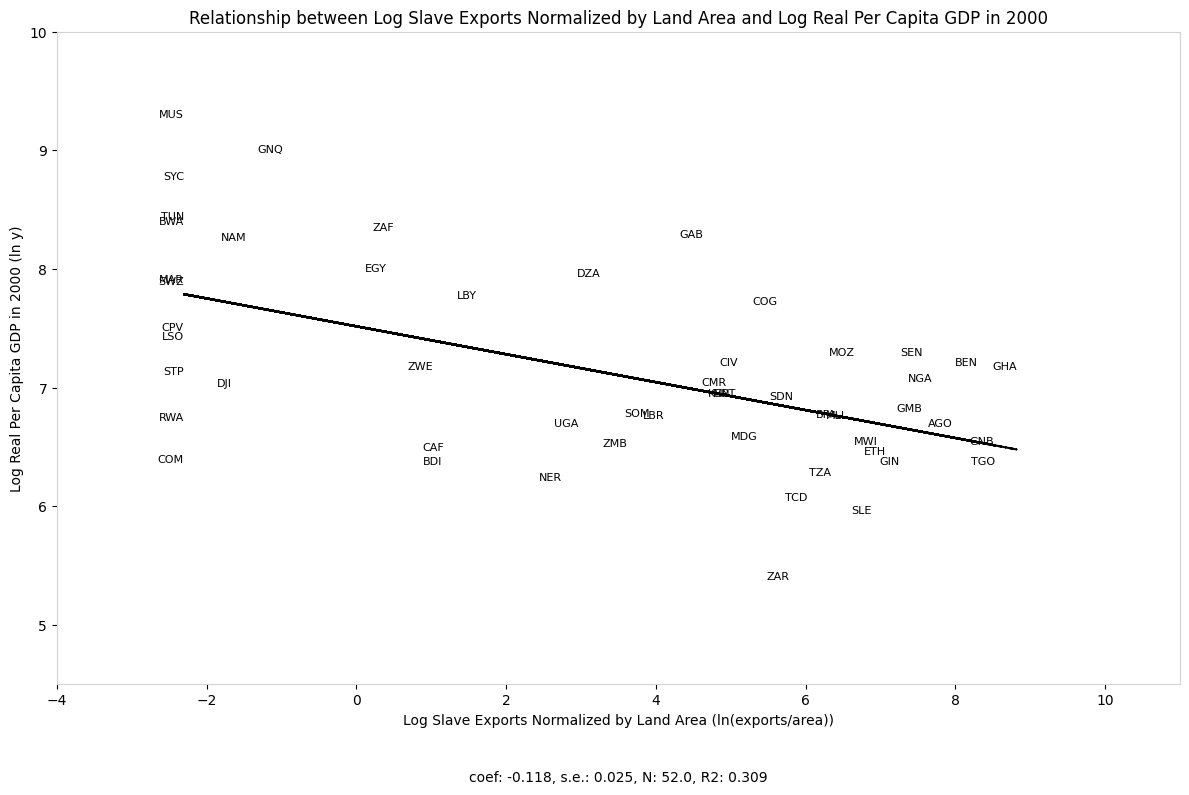

In [ ]:
# Fit OLS model
X = sm.add_constant(df['ln_export_area'])  # Add constant term
model = sm.OLS(df['ln_maddison_pcgdp2000'], X).fit()

# Get slope (coefficient) and its standard error
slope = model.params['ln_export_area']
std_error = model.bse['ln_export_area']

# Calculate the trendline
z = np.polyfit(df['ln_export_area'], df['ln_maddison_pcgdp2000'], 1)
p = np.poly1d(z)

plt.figure(figsize=(12, 8))

# Loop through the countries and plot each one with its name
for i, row in df.iterrows():
    plt.text(row['ln_export_area'], row['ln_maddison_pcgdp2000'], row['isocode'], fontsize=8, ha='right')

# Plot the trendline in black
plt.plot(df['ln_export_area'], p(df['ln_export_area']), "k--")  # Trendline in black

# Setting the x-axis and y-axis limits
plt.xlim(-4, 11)
plt.ylim(4.5, 10)

# Setting the outside border to light gray
spines = plt.gca().spines
for spine in spines.values():
    spine.set_edgecolor('#D3D3D3')  # Light gray color

# Adding information about coefficients, standard errors, number of observations, and R-squared
plt.text(0.5, -0.15, f'coef: {slope:.3f}, s.e.: {std_error:.3f}, N: {model.nobs}, R2: {model.rsquared:.3f}',
         transform=plt.gca().transAxes, fontsize=10, ha='center')

plt.title('Relationship between Log Slave Exports Normalized by Land Area and Log Real Per Capita GDP in 2000')
plt.xlabel('Log Slave Exports Normalized by Land Area (ln(exports/area))')
plt.ylabel('Log Real Per Capita GDP in 2000 (ln y)')
plt.grid(False)
plt.tight_layout()
plt.show()


In [ ]:


# Define the independent variables
independent_vars_1 = ['ln_export_area', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6', 'colony7']

# Perform OLS regression
X = df[independent_vars_1]
X = sm.add_constant(X)  # Add constant term
y = df['ln_maddison_pcgdp2000']
model1 = sm.OLS(y, X).fit()

# Display details of the fit
print(model1.summary())


                              OLS Regression Results                             
Dep. Variable:     ln_maddison_pcgdp2000   R-squared:                       0.505
Model:                               OLS   Adj. R-squared:                  0.413
Method:                    Least Squares   F-statistic:                     5.484
Date:                   Sun, 25 Feb 2024   Prob (F-statistic):           8.63e-05
Time:                           23:39:23   Log-Likelihood:                -45.014
No. Observations:                     52   AIC:                             108.0
Df Residuals:                         43   BIC:                             125.6
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const         

In [ ]:
# Define the updated independent variables
independent_vars_2 = ['ln_export_area', 'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6', 'colony7']

# Perform OLS regression
X = df[independent_vars_2]
X = sm.add_constant(X)  # Add constant term
y = df['ln_maddison_pcgdp2000']
model2 = sm.OLS(y, X).fit()

# Display details of the fit
print(model2.summary())


                              OLS Regression Results                             
Dep. Variable:     ln_maddison_pcgdp2000   R-squared:                       0.601
Model:                               OLS   Adj. R-squared:                  0.450
Method:                    Least Squares   F-statistic:                     3.982
Date:                   Sun, 25 Feb 2024   Prob (F-statistic):           0.000375
Time:                           23:39:25   Log-Likelihood:                -39.404
No. Observations:                     52   AIC:                             108.8
Df Residuals:                         37   BIC:                             138.1
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const   

In [ ]:
# List of countries to exclude
countries_to_exclude = ['Morocco', 'Algeria', 'Tunisia', 'Libya', 'Egypt', 'Seychelles', 'Mauritius', 'Comoros', 'Sao Tome & Principe', 'Cape Verde Islands']

# Filter out rows corresponding to the countries to exclude
filtered_df = df[~df['country'].isin(countries_to_exclude)]

# Perform OLS regression
X = filtered_df[independent_vars_2]
X = sm.add_constant(X)  # Add constant term
y = filtered_df['ln_maddison_pcgdp2000']
model3 = sm.OLS(y, X).fit()

# Display details of the fit
print(model3.summary())


                              OLS Regression Results                             
Dep. Variable:     ln_maddison_pcgdp2000   R-squared:                       0.633
Model:                               OLS   Adj. R-squared:                  0.463
Method:                    Least Squares   F-statistic:                     3.716
Date:                   Sun, 25 Feb 2024   Prob (F-statistic):            0.00175
Time:                           23:39:27   Log-Likelihood:                -24.448
No. Observations:                     42   AIC:                             76.90
Df Residuals:                         28   BIC:                             101.2
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const   

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [ ]:
# Define the updated independent variables
independent_vars_3 = ['ln_export_area', 'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum', 'islam', 'legor_fr', 'legor_uk', 'region_n', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6', 'colony7']

# Perform OLS regression
X = df[independent_vars_3]
X = sm.add_constant(X)  # Add constant term
y = df['ln_maddison_pcgdp2000']
model4 = sm.OLS(y, X).fit()

# Display details of the fit
print(model4.summary())


                              OLS Regression Results                             
Dep. Variable:     ln_maddison_pcgdp2000   R-squared:                       0.709
Model:                               OLS   Adj. R-squared:                  0.551
Method:                    Least Squares   F-statistic:                     4.473
Date:                   Sun, 25 Feb 2024   Prob (F-statistic):           9.80e-05
Time:                           23:39:30   Log-Likelihood:                -31.174
No. Observations:                     52   AIC:                             100.3
Df Residuals:                         33   BIC:                             137.4
Df Model:                             18                                         
Covariance Type:               nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const   

In [ ]:
# Define the updated independent variables
independent_vars_4 = ['ln_export_area', 'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum', 'islam', 'legor_fr', 'legor_uk', 'region_n', 'ln_avg_gold_pop', 'ln_avg_oil_pop', 'ln_avg_all_diamonds_pop', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6', 'colony7']

# Perform OLS regression
X = df[independent_vars_4]
X = sm.add_constant(X)  # Add constant term
y = df['ln_maddison_pcgdp2000']
model5 = sm.OLS(y, X).fit()

# Display details of the fit
print(model5.summary())


                              OLS Regression Results                             
Dep. Variable:     ln_maddison_pcgdp2000   R-squared:                       0.773
Model:                               OLS   Adj. R-squared:                  0.615
Method:                    Least Squares   F-statistic:                     4.874
Date:                   Sun, 25 Feb 2024   Prob (F-statistic):           4.67e-05
Time:                           23:39:32   Log-Likelihood:                -24.706
No. Observations:                     52   AIC:                             93.41
Df Residuals:                         30   BIC:                             136.3
Df Model:                             21                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [ ]:
# Perform OLS regression
X = filtered_df[independent_vars_4]
X = sm.add_constant(X)  # Add constant term
y = filtered_df['ln_maddison_pcgdp2000']
model6 = sm.OLS(y, X).fit()

# Display details of the fit
print(model6.summary())


                              OLS Regression Results                             
Dep. Variable:     ln_maddison_pcgdp2000   R-squared:                       0.797
Model:                               OLS   Adj. R-squared:                  0.639
Method:                    Least Squares   F-statistic:                     5.027
Date:                   Sun, 25 Feb 2024   Prob (F-statistic):           0.000203
Time:                           23:39:34   Log-Likelihood:                -11.983
No. Observations:                     42   AIC:                             61.97
Df Residuals:                         23   BIC:                             94.98
Df Model:                             18                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [ ]:
coefficients = []
std_errors = []
num_observations = []
r_squared = []

for i, model_name in enumerate(['model1', 'model2', 'model3', 'model4', 'model5', 'model6']):
    model = globals()[model_name]
    if i == 0:
        # For model 1, extract coefficients for the first independent variable only
        coefficients.extend(model.params[1:2])
        std_errors.extend(model.bse[1:2])
    elif i == 1 or i == 2:
        # For models 2 and 3, extract coefficients for the first 7 independent variables
        coefficients.extend(model.params[1:7])
        std_errors.extend(model.bse[1:7])
    elif i == 3:
        # For model 4, extract coefficients for the first 11 independent variables
        coefficients.extend(model.params[1:11])
        std_errors.extend(model.bse[1:11])
    elif i == 4 or i == 5:
        # For models 5 and 6, extract coefficients for the first 14 independent variables
        coefficients.extend(model.params[1:14])
        std_errors.extend(model.bse[1:14])

    # Extract number of observations and R-squared for all models
    num_observations.append(model.nobs)
    r_squared.append(model.rsquared)

# Print or use the extracted coefficients, standard errors, number of observations, and R-squared values
print("Coefficients:", coefficients)
print("Standard Errors:", std_errors)
print("Number of Observations:", num_observations)
print("R-squared:", r_squared)





Coefficients: [-0.1119368182312719, -0.0761698439584981, 0.015837139171991935, 0.0004992515530329285, -0.0006244969349013252, 0.009443509193388412, -0.018864395608276324, -0.1080404067997166, -0.004951799018353631, -0.006925696252519476, 0.007899915253861828, 0.00789492213184892, -0.039167201836497925, -0.08536826493378735, 0.019406362222589957, -0.00381498815605779, 0.00013011910513108585, 0.00901828840496862, -0.004914140963504288, 0.0953744385029246, -0.39834126171347206, -0.008416647212314395, 2.4495292681551444, -0.10324781654267168, 0.022810756807731924, -0.0038870433573261927, -0.000971833258794727, 0.014789663786846534, -0.01507660472945882, 0.08249963911028607, -0.15040415490269865, -0.005881759954692853, 2.396445053624093, 1.7537385449245622, -0.3039422601922095, 0.010969591094506449, -0.1276869990179095, 0.0061469861864478365, -0.009410298155571952, -0.0017904255390336632, 0.012649823995869067, -0.03703411690654544, 0.08295867107121377, 5.450255339018975e-16, -0.002879606823

In [ ]:
# Initialize empty DataFrame
df = pd.DataFrame()

# Iterate through each model
for i, model_name in enumerate(['model1', 'model2', 'model3', 'model4', 'model5', 'model6']):
    model = globals()[model_name]
    coefficients = []
    std_errors = []

    if i == 0:
        # For model 1, extract coefficients for the first independent variable only
        coefficients.extend(model.params[1:2])
        std_errors.extend(model.bse[1:2])
    elif i == 1 or i == 2:
        # For models 2 and 3, extract coefficients for the first 7 independent variables
        coefficients.extend(model.params[1:8])
        std_errors.extend(model.bse[1:8])
    elif i == 3:
        # For model 4, extract coefficients for the first 11 independent variables
        coefficients.extend(model.params[1:12])
        std_errors.extend(model.bse[1:12])
    elif i == 4 or i == 5:
        # For models 5 and 6, extract coefficients for the first 14 independent variables
        coefficients.extend(model.params[1:15])
        std_errors.extend(model.bse[1:15])

    # Add coefficients and standard errors to DataFrame
    model_df = pd.DataFrame([coefficients, std_errors])

    # Transpose DataFrame and set column names
    model_df = model_df.T
    model_df.columns = [f'Model {i+1}'] * len(model_df.columns)

    # Append to main DataFrame
    df = pd.concat([df, model_df])

# Display DataFrame
print(df)


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

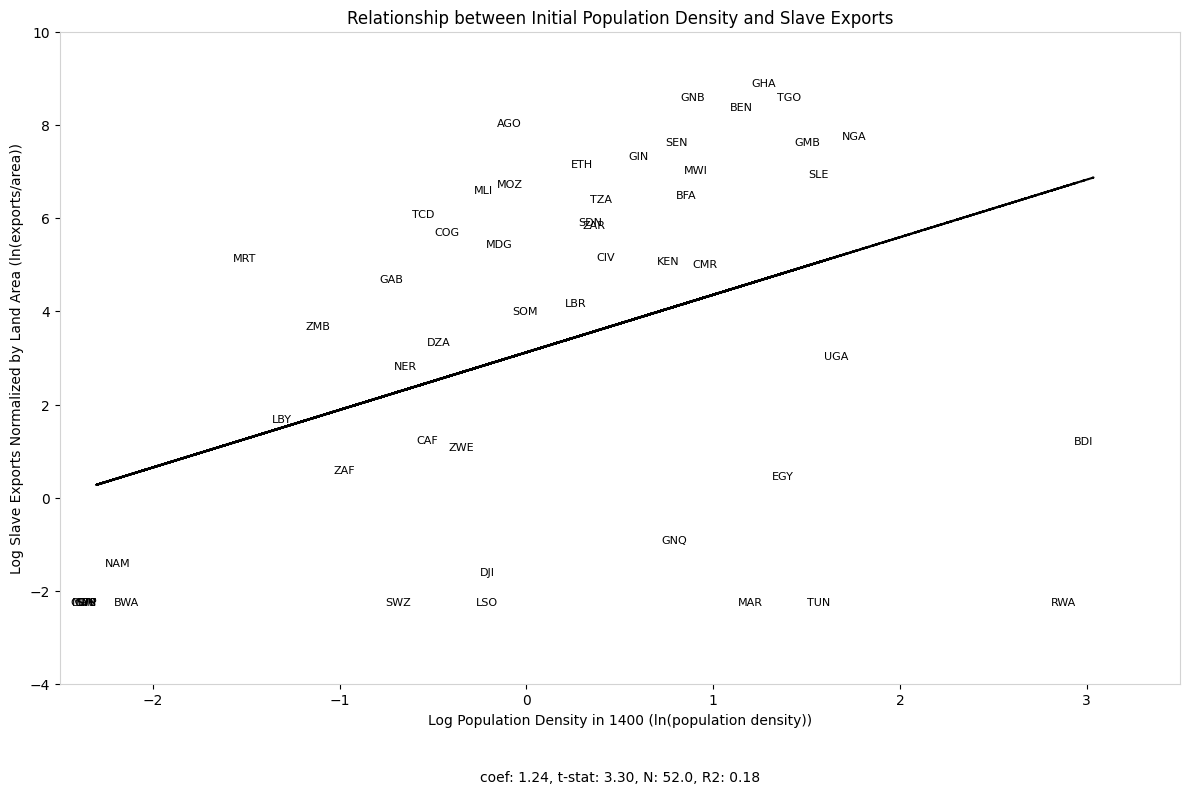

In [ ]:
# Fit OLS model
X = sm.add_constant(df['ln_pop_dens_1400'])  # Add constant term
model = sm.OLS(df['ln_export_area'], X).fit()

# Get slope (coefficient) and its standard error
beta = model.params.values.reshape(-1,1)
slope = model.params['ln_pop_dens_1400']
t_stat = model.tvalues['ln_pop_dens_1400']

# Calculate the trendline
z = np.polyfit(df['ln_pop_dens_1400'], df['ln_export_area'], 1)
p = np.poly1d(z)

plt.figure(figsize=(12, 8))

# Loop through the countries and plot each one with its name
for i, row in df.iterrows():
    plt.text(row['ln_pop_dens_1400'], row['ln_export_area'], row['isocode'], fontsize=8, ha='right')

# Plot the trendline in black
plt.plot(df['ln_pop_dens_1400'], p(df['ln_pop_dens_1400']), "k--")  # Trendline in black

# Setting the x-axis and y-axis limits
plt.xlim(-2.5, 3.5)
plt.ylim(-4, 10)

# Setting the outside border to light gray
spines = plt.gca().spines
for spine in spines.values():
    spine.set_edgecolor('#D3D3D3')  # Light gray color

# Adding information about coefficients, standard errors, number of observations, and R-squared
plt.text(0.5, -0.15, f'coef: {slope:.2f}, t-stat: {t_stat:.2f}, N: {model.nobs}, R2: {model.rsquared:.2f}',
         transform=plt.gca().transAxes, fontsize=10, ha='center')

plt.title('Relationship between Initial Population Density and Slave Exports')
plt.xlabel('Log Population Density in 1400 (ln(population density))')
plt.ylabel('Log Slave Exports Normalized by Land Area (ln(exports/area))')
plt.grid(False)
plt.tight_layout()
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   isocode                    52 non-null     object 
 1   country                    52 non-null     object 
 2   ln_maddison_pcgdp2000      52 non-null     float32
 3   ln_export_area             52 non-null     float32
 4   ln_export_pop              52 non-null     float32
 5   colony0                    52 non-null     float32
 6   colony1                    52 non-null     float32
 7   colony2                    52 non-null     float32
 8   colony3                    52 non-null     float32
 9   colony4                    52 non-null     float32
 10  colony5                    52 non-null     float32
 11  colony6                    52 non-null     float32
 12  colony7                    52 non-null     float32
 13  abs_latitude               52 non-null     float32
 

In [ ]:
!pip install linearmodels


In [ ]:
import linearmodels.iv.model as lm

In [ ]:
# First stage regression
X_first_stage = sm.add_constant(df[['atlantic_distance_minimum', 'indian_distance_minimum', 'saharan_distance_minimum', 'red_sea_distance_minimum']])
first_stage_model = lm.IV2SLS(df['ln_export_area'], X_first_stage, None, None).fit(cov_type='homoskedastic', debiased=True)

# Get the predicted values from the first stage
df['ln_export_area_predicted'] = first_stage_model.predict()

# Second stage regression
X_second_stage = sm.add_constant(df[['ln_export_area_predicted']])
second_stage_model = lm.IV2SLS(df['ln_maddison_pcgdp2000'], X_second_stage, None, None).fit(cov_type='homoskedastic', debiased=True)

# Print the results of the second stage
print(first_stage_model.summary)
print(second_stage_model.summary)


                            OLS Estimation Summary                            
Dep. Variable:         ln_export_area   R-squared:                      0.2789
Estimator:                        OLS   Adj. R-squared:                 0.2176
No. Observations:                  52   F-statistic:                    4.5454
Date:                Sun, Feb 25 2024   P-value (F-stat)                0.0035
Time:                        23:40:10   Distribution:                  F(4,47)
Cov. Estimator:         homoskedastic                                         
                                                                              
                                     Parameter Estimates                                     
                           Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------------
const                         29.110     6.9594     4.1828     0.0001      15.109     

In [ ]:
mdatac = sm.add_constant(data = df, prepend = False)
mlr2 = lm.IV2SLS(mdatac['ln_maddison_pcgdp2000'], mdatac[['colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6', 'colony7']],
                 mdatac['ln_export_area'], mdatac[['atlantic_distance_minimum', 'indian_distance_minimum', 'saharan_distance_minimum', 'red_sea_distance_minimum']]).fit(cov_type='homoskedastic', debiased=True)

# Print the results of the second stage
print(mlr2.summary)


                            IV-2SLS Estimation Summary                           
Dep. Variable:     ln_maddison_pcgdp2000   R-squared:                      0.3424
Estimator:                       IV-2SLS   Adj. R-squared:                 0.2201
No. Observations:                     52   F-statistic:                    557.28
Date:                   Sun, Feb 25 2024   P-value (F-stat)                0.0000
Time:                           23:40:12   Distribution:                  F(9,43)
Cov. Estimator:            homoskedastic                                         
                                                                                 
                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
colony0            7.7160     0.5791     13.323     0.0000      6.5480      8.8839
colony1     

In [ ]:
mlr3 = lm.IV2SLS(mdatac['ln_maddison_pcgdp2000'], mdatac[['colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6', 'colony7',
                                                          'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area']], mdatac['ln_export_area'],
                 mdatac[['atlantic_distance_minimum', 'indian_distance_minimum', 'saharan_distance_minimum', 'red_sea_distance_minimum']]).fit(cov_type='homoskedastic', debiased=True)

# Print the results of the second stage
print(mlr3.summary)


                            IV-2SLS Estimation Summary                           
Dep. Variable:     ln_maddison_pcgdp2000   R-squared:                      0.0411
Estimator:                       IV-2SLS   Adj. R-squared:                -0.3217
No. Observations:                     52   F-statistic:                    197.54
Date:                   Sun, Feb 25 2024   P-value (F-stat)                0.0000
Time:                           23:40:15   Distribution:                 F(15,37)
Cov. Estimator:            homoskedastic                                         
                                                                                 
                                 Parameter Estimates                                 
                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------
colony0               8.6018     2.5254     3.4061     0.0016      3.4848      13.719


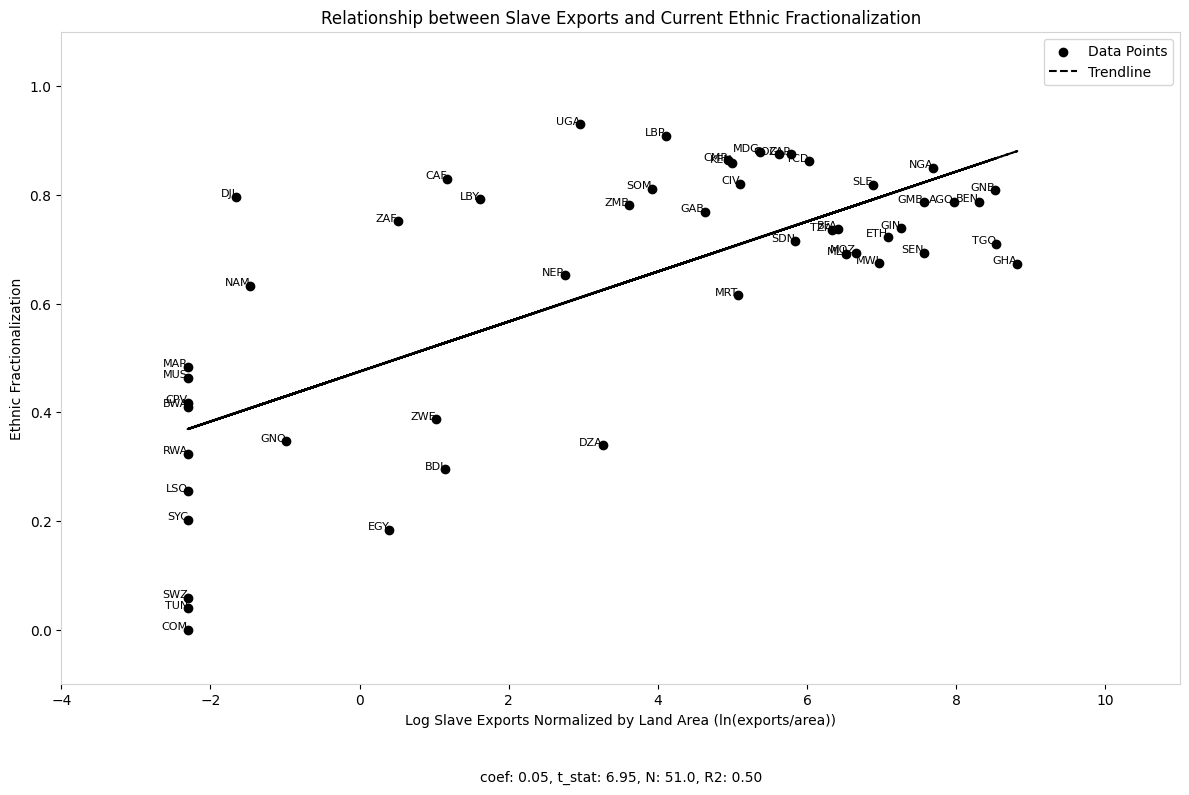

In [ ]:
# Fit OLS model
lr = smf.ols(formula="ethnic_fractionalization ~ ln_export_area", data=df).fit()

slope = lr.params[1]
intercept = lr.params[0]

# Calculate the predicted values (trendline)
predicted_values = slope * df['ln_export_area'] + intercept

plt.figure(figsize=(12, 8))

# Plot the data points
plt.scatter(df['ln_export_area'], df['ethnic_fractionalization'], color='black', label='Data Points')

# Plot the trendline
plt.plot(df['ln_export_area'], predicted_values, "k--", label='Trendline')

# Loop through the countries and plot each one with its name
for i, row in df.iterrows():
    plt.text(row['ln_export_area'], row['ethnic_fractionalization'], row['isocode'], fontsize=8, ha='right')

# Setting the x-axis and y-axis limits
plt.xlim(-4, 11)
plt.ylim(-0.1, 1.1)

# Setting the outside border to light gray
spines = plt.gca().spines
for spine in spines.values():
    spine.set_edgecolor('#D3D3D3')  # Light gray color

# Adding information about coefficients, standard errors, number of observations, and R-squared
plt.text(0.5, -0.15, f'coef: {slope:.2f}, t_stat: {lr.tvalues[1]:.2f}, N: {lr.nobs}, R2: {lr.rsquared:.2f}',
         transform=plt.gca().transAxes, fontsize=10, ha='center')

plt.title('Relationship between Slave Exports and Current Ethnic Fractionalization')
plt.xlabel('Log Slave Exports Normalized by Land Area (ln(exports/area))')
plt.ylabel('Ethnic Fractionalization')
plt.grid(False)
plt.tight_layout()
plt.legend()
plt.show()


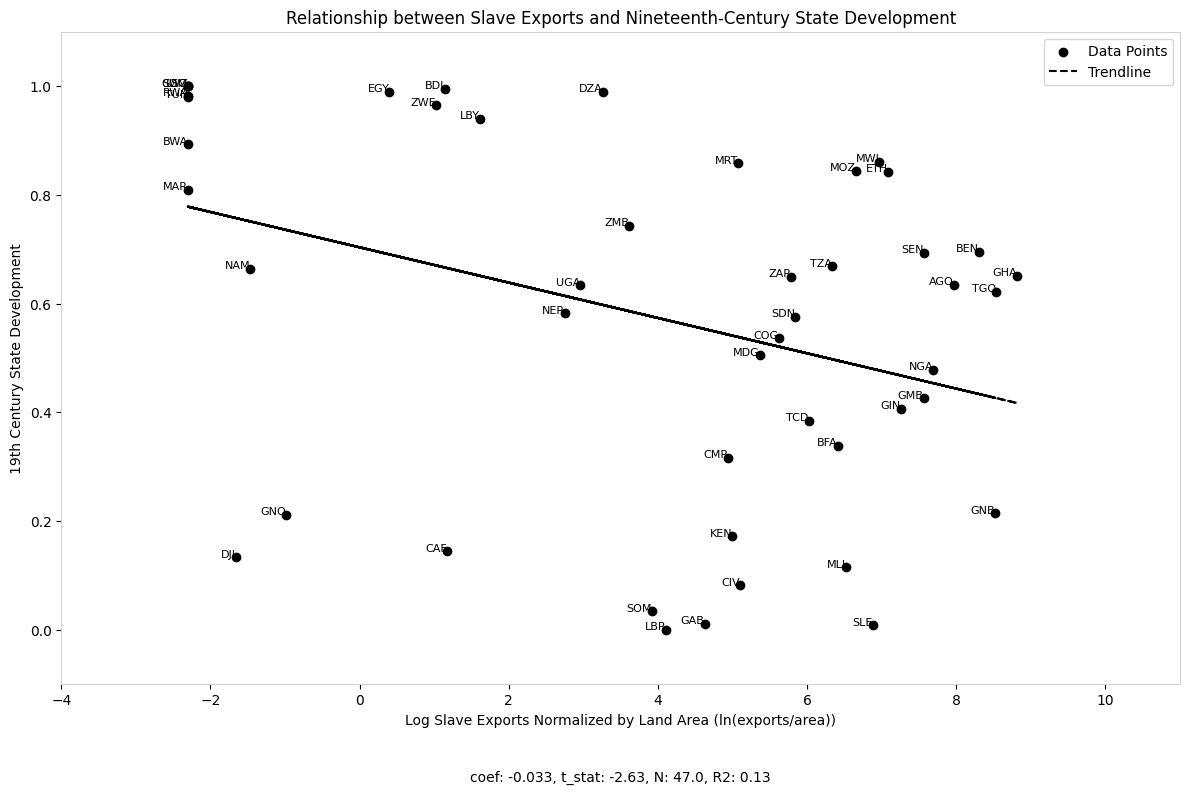

In [ ]:
# Fit OLS model
lr = smf.ols(formula="state_dev ~ ln_export_area", data=df).fit()

slope = lr.params[1]
intercept = lr.params[0]

# Calculate the predicted values (trendline)
predicted_values = slope * df['ln_export_area'] + intercept

plt.figure(figsize=(12, 8))

# Plot the data points
plt.scatter(df['ln_export_area'], df['state_dev'], color='black', label='Data Points')

# Plot the trendline
plt.plot(df['ln_export_area'], predicted_values, "k--", label='Trendline')

# Loop through the countries and plot each one with its name
for i, row in df.iterrows():
    plt.text(row['ln_export_area'], row['state_dev'], row['isocode'], fontsize=8, ha='right')

# Setting the x-axis and y-axis limits
plt.xlim(-4, 11)
plt.ylim(-0.1, 1.1)

# Setting the outside border to light gray
spines = plt.gca().spines
for spine in spines.values():
    spine.set_edgecolor('#D3D3D3')  # Light gray color

# Adding information about coefficients, standard errors, number of observations, and R-squared
plt.text(0.5, -0.15, f'coef: {slope:.3f}, t_stat: {lr.tvalues[1]:.2f}, N: {lr.nobs}, R2: {lr.rsquared:.2f}',
         transform=plt.gca().transAxes, fontsize=10, ha='center')

plt.title('Relationship between Slave Exports and Nineteenth-Century State Development')
plt.xlabel('Log Slave Exports Normalized by Land Area (ln(exports/area))')
plt.ylabel('19th Century State Development')
plt.grid(False)
plt.tight_layout()
plt.legend()
plt.show()
